# Objectives & Approach

This report describes the findings from an analysis of sales review data for the major US retail chain, JCPenney. It is the final assignment for the module ITNPBD2 - Representing and Manipulating Data.  This analysis uses the five datasets provided, with some supplementary data to augment.

The report is structured into the following parts:

***Main Report***
- Summary
- Objectives & Approach
- Data Collation, Exploration & Preparation
- Data Analysis
- Conclusions
- References

***Appendices - With Full Pyth0n Code and Outputs***
- Appendix 1 - Details: Data Collation, Exploration & Preparation
- Appendix 2 - Details: Data Analysis

## Approach

This is intended primarily as a business report to identify and make recommendations for improvements, with appropriate supporting evidence. In addition, there is a need to meet the additional assignment objectives of:

- Demonstrate that a data science process (here CRISP-DM) has been followed;
- Demonstrate the use of Python for data manipulation and analysis.

However, once the analysis commenced it quickly became evident that two challenges needed to be addressed. The first is that trying to produce a single PDF report with commentary, Python code and runtime output would result in a very long and difficult to read artefact. The second challenge was that a brief examination of the data using Data Wrangler (Microsoft, 2023) quickly revealed that the data was of very poor quality and would make meaningful business conclusions possibly misleading.

As a result, the following approach has been taken:

- Focus on the data preparation part of the process and make recommendations on areas to improve
- Carry out some limited business analysis, but no significant geographic or demographic aspects
- Establish a set of processes that can be reused when better quality source data is available

And in terms of assignment documents:

- Submit a report PDF in two parts: largely text report with a supporting appendix detailing all Python code and output
- Submit the set of Jupyter Notebooks used to produce the above

## CRISP-DM

The approach to the analysis follows parts two, three and four of the six stage "CRoss-Industry Standard Process for Data Mining' (CRISP-DM) process (Ncr et al., 1999), (Hotz, 2024). In summary, this process is:

1. Business Understanding: Define project objectives and requirements by collaborating with stakeholders
2. Data Understanding: Collect and explore data, analysing its characteristics and quality
3. Data Preparation: Clean, handle missing values, and transform variables to create a structured dataset
4. Modelling: Apply various techniques such as machine learning algorithms or statistical models to the prepared data
5. Evaluation: Rigorously assess models based on predefined criteria, including performance and reliability
6. Deployment: Integrate successful models into existing systems and monitor their effectiveness

## Who Are JCPenney?

JCPenney (JCP) is a major North American department store chain ([Wikipedia](https://en.wikipedia.org/wiki/JCPenney)), operating as Penney OpCo LLC. JCP has 656 stores in 49 states plus Puerto Rico according to the [JCP Store Locator](https://www.jcpenney.com/locations/index.html). 

In 2020, JCP filed for bankruptcy and were purchased by an asset management company, a large number of stores were also closed. Later, in August 2023, JCP announced a major turnaround plan to replace its current website and inventory management systems, as well as make major upgrades to its retails stores (ModernRetail, 2023). Note that it is assumed that the data used here was extracted from the operational systems prior to any overhaul of information systems.


# Data Collation, Exploration & Preparation

This section describes the sequence and findings of the process of collating the source data, validating and then preparing it for subsequent analysis. Once the preparation processes are all completed the resultant dataframes are persisted locally (using magic command store) making them available for further analysis.

## Provided Data Sources & Content

The provided data sources for this analysis of JC Penney consists of two JSON files and three CSV files:
- JSON: jcpenney_products, jcpenney_reviewers
- CSV: products, reviews, users

It was not immediately obvious what the relationships between the two types of data files were but the json and CSV files appear to be partial duplicates of each other; also the three CSV files hold slightly less information (eg sales price is missing from the csv files). The CSV files appear to be a first attempt to extract data from the json files (eg the json products file has a JSON field holding multiple user reviews and this has looks to have been extracted to prepare the reviews.csv file).

Given the above, the approach used in this analysis was to go back to the 'original' JSON files and work from these but with appropriate sanity checks against the three CSV files to make sure no data was missed or inconsistent.


### Load JSON Data Files

It is assumed that the data is a snapshot extract of sales information from JCP operational system and the bulk of this has been flattened and used to create the jcpenney_products.json file and the jcpenney_reviewers.json file.

The two tables below show the data items and key counts for each file.

![Table](resources/datatable1.png)

![Table](resources/datatable2.png)

![Table](resources/datatable34.png)

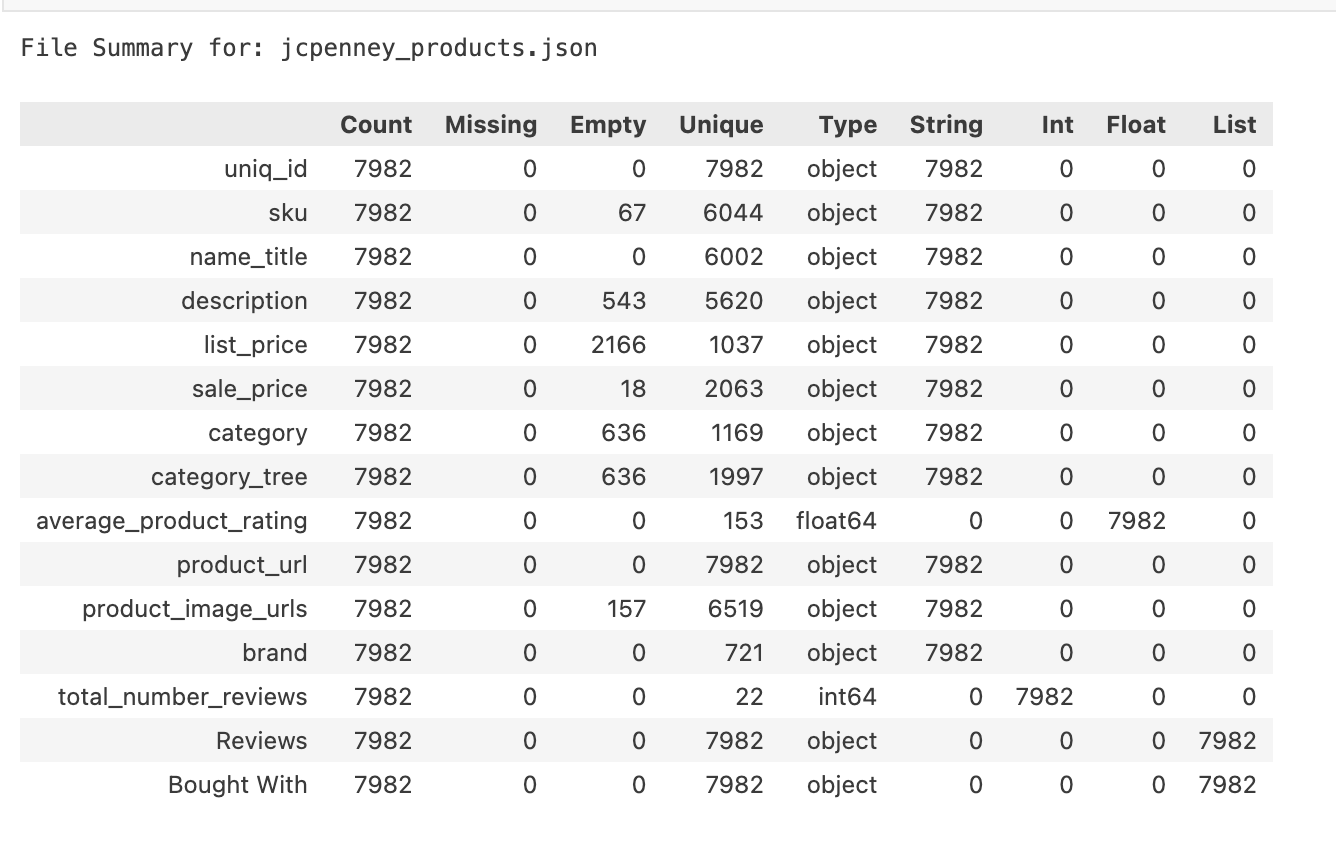

In [1]:
from IPython.display import Image
Image(filename='resources/datatable1.png')

## Working Data Structure - Validation & Augmentation 

### Data Structure Summary

The five data sources provided were examined and validated in more detail in order to understand the contents and data structure, and to complete any cleaning required. In addition, areas requiring augmentation were identified and additional data was sourced and combined with the original sources. The resulting working data structure consists of five dataframes, their preparation and content is described in the sections that follow, in the order of their preparation. In summary the five dataframes are:

***Sales***

- Details of all sales activity, 7,982 sales records
- Uniquely identified by the key 'uniq_id', in the Pandas dataframe: *sales_df*
- Sourced from the provided file: jcpenney_products.json
- A relatively small number of sales prices were missing 

***Customer Sales Reviews***

- Details of all customer reviews, 39,063 in total
- Uniquely identified by combined 'uniq_id' + 'customer_id', in the Pandas dataframe: *customer_reviews_df*
- Sourced from the provided file: jcpenney_products.json 
- Major issues with the quality of the reviews and and so of limited use in analysis. For example, 15,535 reviews appear to be duplicated across different customers. This could be a data export issue or even the introduction of fake reviews

***Customer Details***

- A reference list of 5,001 unique JCP customers who have submitted reviews of purchases
- Uniquely identified by the key 'customer_id', in the Pandas dataframe: *customers_df*
- Sourced from the provided file: jcpenney_reviewers.json
- Major issues with the quality of date of birth information. Appears to be artificially generated and so of limited use in analysis

***Stock Details***

- A reference list of 6,110 unique stock items
- Uniquely identified by the key 'sku', in the Pandas dataframe: *stock_df*
- Sourced from the provided file: jcpenney_products.json
- Derived from the 6,044 unique items in the file jcpenney_products.json
- Some issues with basic data differences for stock but these have been rationalised

***States & Territories***

- A reference list of the 57 US states and territories, with population and JCP store numbers per state
- Uniquely identified by the key 'state_ISO', in the Pandas dataframe: *states_df*
- Sourced from the file: JCP_Stores_State_Collated.csv
- Originated from the JCP store locater website and from the US Census Bureau

### States & Territories

A reference list for all US states and territories. Contains 57 items (51 states and 6 territories). This is the ISO code for later validation of the provided customers data and with population data and JCP store numbers to assist later geographic analysis.

The data was sourced from:
- JCP's store locator, see [website](https://www.jcpenney.com/locations/index.html)
- US Census Bureau, see [website](https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html)

***Data Content***

After review and validation the created dataframe, states_df, has 57 unique items. It consists of:

- territory_flag - Indicates whether a state or a territory
- state_ISO - ISO code of the state, territory
- state_name - Name of the state, territory
- population - Population at 2023
- stores_total - Total number of stores at November 2024

***Collation & Validation***

The additional data file, JCP_Stores_State_Collated.csv, was loaded and validated. 

![Table](resources/datatable45.png)

### Customers

Details of customers that have completed a review of a purchase made. With 5,001 unique customer records. All customers have a date of birth, however examination of this showed that only 14 were really unique and appear to be artificially generated. Arguably this field should be dropped as it will not provide any meaningful results. However, it has been retained purely so that it can be used to demonstrate analysis techniques.

***Data Content***

After review and validation the created dataframe, customers_df, has 5,001 unique customers. It consists of:

- customer_id - A unique alphanumeric id
- DOB - Date of birth
- state_ISO - ISO code for the state or territory. A cross-reference to the states_df

***Collation & Validation***

The provided data file, jcpenney_reviewers.json, was examined. As these appears to be detailing customers that have completed a review, the term 'customer' was used instead of reviewer. The following actions were taken:

- Fields Rename: Columns renamed to be consistent with other dataframes
- Duplicates: One customer_id was used twice. To preserve information, it was decided to keep the duplicates and assign them a new unique customer_id
- Date of Birth: Surprisingly for 5,001 customers only 52 birth dates were found. Closer examination revealed that a day, month sequence was incremented across years, with only 14 unique dates ranging nge only from 26 July to 8 August.
- States: When validating against the states reference file to obtain ISO codes, 187 customers did not match due to the incorrect naming of the US Virgin Islands and US Minor Outlying Islands, so these were corrected. Only the ISO code was retained and the full state name dropped, in preference to it being looked up when required
- uniq_id_list - This list was dropped once the details had been cross-checked against the new customer_reviews and sales dataframes.

![Table](resources/datatable56.png)

### Stock Details

Details of all stock (product) data. Contains 6,110 unique lines of stock with each uniquely identified by the key 'sku'. For each stock line the details include description and its list price. There was significant inconsistency of basic details (name, description, list price, image url) for stock items in the provided products file. An attempt has been made to rationalise the data by retaining the most commonly used data items.

***Data Content***

After review and validation the created dataframe, stock_df, has 6,110 unique stock records. It consists of:

- sku - The unique identifier for the stock item
- stock_name - Short name for the stock item
- description - A long description of the stock
- list_price - The standard price for the stock
- stock_image_url - URL for the website image for the stock
- brand - The manufacturer's name for the stock item, eg 'Alfred Dunner'

***Collation & Validation***

The provided data file, jcpenney_products.json, was examined and all stock specific data extracted into the stock_df dataframe. The following actions were taken:

- Missing SKU ids: 67 were missing, so generated ids were added according in line with the most common format structure, to pp600nnnnnnn
- Drop Fields: Drop all fields that are sales specific: 'uniq_id', 'sale_price', 'category', 'category_tree', 'average_product_rating', 'product_url', 'total_number_reviews', 'Reviews', 'Bought With'
- Stock Name: A significant number of names differed for the same sku. The first name has been retained
- Description: A significant number of descriptions differed for the same sku or were missing. The first name has been retained. However, still 50 had no description so 'No Description Available' was added
- List Price: A significant number of items had different prices for the same stock. So the most common price for each item was used. Even so, 95 stock items do not have a list price
- Stock Image URL: For 170 stock items, the urls did not all match and so the most frequent one was retained. A sample request of images was successful (nb a VPN was requied as non-US locations were filtered).
- Brand: No missing or duplicated, so just copy one
- Rationalise Stock: Retain only a single unique sku record

***Reasons for Splitting Sales & Stock Data***

The provided file, jcpenney_products.json, appears to contain core stock information and sales specific information. For example a stock list price and a different sales price that varied depending on different sales categories. So stock data has been split out and cleaned in order to be able to more easily analyse stock vs sales data.

It has been assumed that the field sku is the 'Stock Keeping Unit' see [Wikipedia](https://en.wikipedia.org/wiki/Stock_keeping_unit) and should be a unique identifier. Therefore all instances of sku have been reviewed and collapsed down into a stock list dataframe, separate from sales activity. The 6,044 product rows have produced 1,154 stock lines.

![Table](resources/datatable78.png)


### Sales

Details of all sales activity. Contains 7,982 sales records with each uniquely identified by the key 'uniq_id'. The data for each sale includes the sales price, stock reference and sales channel information. Most of the data appeared complete and reasonably, although several hundred sales prices were in an invalid format or missing; the relatively small number should not skew later analysis.

***Data Content***

After review and validation the created dataframe, sales_df, has 7,982 records. It consists of:

- uniq_id - A unique identifier for the sales activity
- sku - A cross-reference for stock data in the stock_df
- sale_price - The price that the sales was 
- category_tree - A string breaking down the structure of the sales channel
- category - The bottom level of the category tree
- sales_product_url - JCP website url for the product details as sold
- average_product_rating - An average of the customer review scores (1 to 5) for this sale
- total_number_reviews - The total number of customer reviews for this sale
- bought_with_list - other sales at the same time as this sale

***Collation & Validation***

The provided data file, jcpenney_products.json, was examined and all sales specific data extracted into the sales_df dataframe. The following actions are highlighted:

- Invalid & Missing Prices: 263 sales prices were in a range format (34.5-45.9) and these were converted taking the average. And 18 had no price and so were zeroed
- Categories Missing: 636 categories, category trees are missing. About 10% of the 7,982 sales
- Sales Product URL: All good, no missing or duplicated. However, a sample of requests to use the URL all failed
- Bought With: This was not reviewed and has been retained as source

![Table](resources/datatable910.png)


### Customer Sales Reviews

There are a total of 39,063 reviews but only 29,464 appear to be unique review comments. Further analysis found that 15,535 (40%) of reviews were used by several customers, worst case being several instances of 18 customers using the same comments. This could be because the sample data has been automatically generated or that customer ids are being created to generate false reviews. This data has *not* been dropped from the dataset, although later analysis of the reviews could be misleading.

***Data Content***

After review and validation the created dataframe, customer_reviews_df, has 39,063 customer reviews. It consists of:

- uniq_id - A cross-reference for sales data in the sales_df
- customer_id - A cross-reference for customer data in the customers_df
- review_text - Review comments made by the customer for the sale
- review_score - The score of 1 to 5 given by the customer

***Collation & Validation***

The provided data file, jcpenney_products.json, was examined and all review specific data extracted into the customer_reviews_df dataframe. This was carried out after first creating the stock_df and the sales_df. The following actions were taken:

- Reviews: From the sales details the list of customer reviews was decoded from its JSON format
- Ratings: The totals and averages across multiple customers were cross-checked to the sales data
- Customers: 17 reviews did not have a valid existing customer and a dummy customer was created (but flagged with state ISO of XX and DOB of NAT) so as not to loose the review data
- In 11 instances there were two reviews for the same customer and sale, but with different review comments; these were left as only a small number

![Table](resources/datatable1112.png)

![Table](resources/commentssalesreviews1.png)


***CSV File Rejected***

The reviews.csv file was examined and the scores were found to have a large number of zero values (11,265 out of 39,063) and a quick examination showed that many scores differ between the JSON and CSV source. This confirmed the decision to reject the CSV data and only use the JSON source.